# Test groupig con t-SNE

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

## Lettura dati

Test con dati Rt degli ultimi 2 mesi memorizzati su file Excel

In [22]:
data=pd.read_excel('rt_regioni.xls')
data.tail(5)

,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto,Italia
2021-02-19,1.084066,1.025067,0.969735,1.022881,0.921245,0.946238,0.897953,1.005005,1.003693,1.024595,...,1.021186,0.991091,0.908028,0.975961,0.956911,1.061140,1.050728,0.931579,0.937055,0.971304
2021-02-20,1.066811,1.021648,0.968454,1.013179,0.922703,0.947604,0.906770,0.981092,1.011480,1.021819,...,1.039797,0.990608,0.885264,0.969253,0.950004,1.057791,1.040120,0.939286,0.911386,0.965740
2021-02-21,1.042502,1.019431,0.970940,1.012097,0.928275,0.959331,0.919161,0.973761,1.034247,1.041628,...,1.063475,1.000773,0.860890,0.963637,0.922724,1.070518,1.034358,0.985240,0.897091,0.965198
2021-02-22,1.040635,1.024279,0.971561,1.012099,0.954207,0.970947,0.935768,0.974198,1.068963,1.062527,...,1.085641,1.016117,0.849385,0.961899,0.899011,1.096671,1.026972,1.007519,0.898103,0.972867
2021-02-23,1.040188,1.030820,0.977464,1.018888,0.984876,0.977031,0.957867,0.993902,1.089805,1.072107,...,1.083348,1.042278,0.862412,0.964465,0.884544,1.122437,1.020880,1.028249,0.928156,0.986404


## T-SNE

### Operazioni preliminari

In [28]:
data_matrix=data.values

# estraggo nomi regioni
regioni=data.columns.values

# estraggo i giorni
giorni=data.index.values

# traspongo per avere una riga per ciascuna regione
data_matrix=data_matrix.transpose()

# ultimi giorni di osservazione su cui baso l'analisi
last_days=30
# estraggo i dati da analizzare
anal_data=data_matrix[:,-last_days:]

### Applicazione algoritmo

In [31]:
embedded_space=TSNE(learning_rate=200,perplexity=3).fit_transform(anal_data)

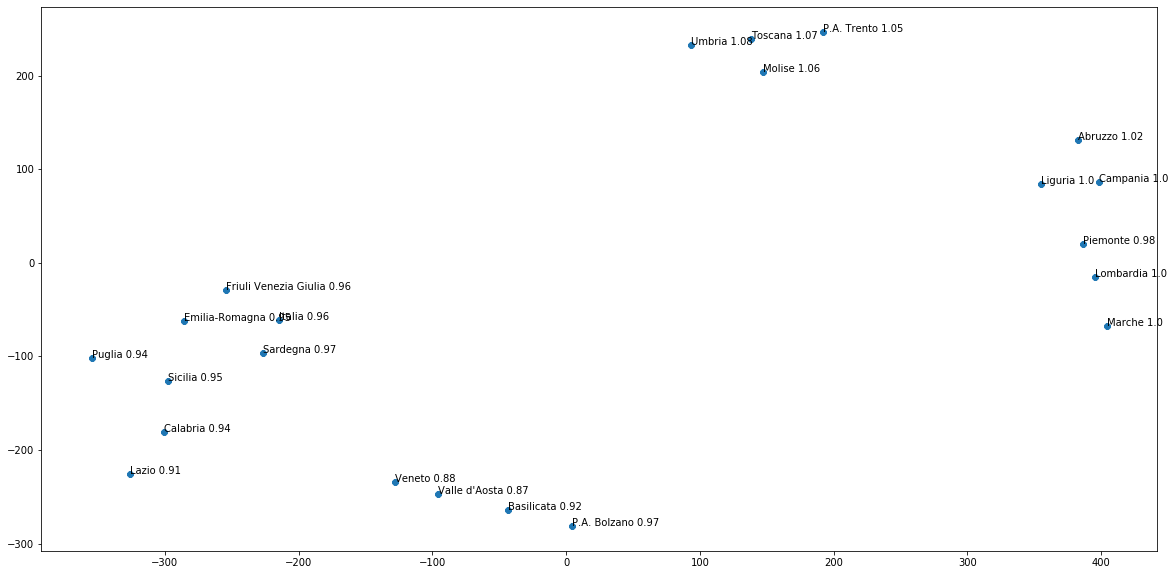

In [32]:
# plot

fig,ax=plt.subplots(1,1,figsize=(20,10))

ax.plot(embedded_space[:,0],embedded_space[:,1],marker='8',linestyle='')
#ax.set_yscale('log')
#ax.set_xscale('log')

# creo una stringa complementare per ciascuna regione
#reg_info=[str(np.round(anal_data[i,-1]-anal_data[i,0],2)) for i in range(len(regioni))]
reg_info=[str(np.round(np.mean(anal_data[i,:]),2)) for i in range(len(regioni))]

for i in range(len(regioni)):
    ax.text(embedded_space[i,0],
            embedded_space[i,1],
            regioni[i]+' '+reg_info[i])
